# TANZANIA WATER POINTS ANALYSIS USING MACHINE LEARNING

#### PROBLEM STATEMENT

The Tanzanian Ministry of Water needs to ensure that clean, potable water is available to communities across Tanzania using limited resources.

That water can be provided by improving the maintenance of existing waterpoints and by expanding the number of waterpoints

If we can accurately classify a waterpoint, the Ministry will have a better understanding of their existing infrastructure, and because of cost savings, will be able to reallocate existing resources to expand the water infrastructure.

The ministry needs to be able to predict which class the waterpoints belong to: functional, functional but need some repairs, and non-functional.

## DATA

Data is provided by Taarifa and the Tanzanian Ministry of Water originally as part of a competition hosted by DrivenData.

EDA / Data Cleaning
The data provided has a lot of cleaning procedures that are done within this notebook..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
training_labels_data = pd.read_csv("training-set-labels.csv")
training_set_data = pd.read_csv("training-set-values.csv")


In [3]:
training_labels_data.head()
#training_set_data.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
#setting the id column as index for both dataframes before merging
training_labels_data.set_index("id",inplace = True)
training_set_data.set_index("id",inplace = True)
df = pd.merge(training_labels_data, training_set_data, how = 'inner', left_index = True,right_index=True)
df.reset_index(inplace = True)
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
df.shape

(59400, 41)

In [6]:
df.dtypes

id                         int64
status_group              object
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [8]:
df.isna().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [9]:
df.status_group.isna().sum()

0

#### assessing our target column


In [10]:
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

There are no null values in the column 

There are three unique values fo this class namely; functional,non functional and functional needs repair.

Looking at the target values, we see that theres an imbalance of values in our class.

In [11]:
# converting these values into tenary values
# target_var = {'functional':0, 
#                    'non functional': 2, 
#                    'functional needs repair': 1} 
# df['status_group'] = df['status_group'].replace(target_var)

##### ASSESSING OTHER COLUMNS

#### quantity and quantity_group columns

In [12]:
df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [13]:
df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [14]:
df.quantity_group.value_counts() == df.quantity.value_counts()

enough          True
insufficient    True
dry             True
seasonal        True
unknown         True
dtype: bool

From the above assessment, we can see that the two columns contain similar information. Therefore we will drop the "quantity_group" column.

In [15]:
df.drop("quantity_group",axis = 1,inplace = True)

#### management,management_group,scheme_management columns

In [16]:

df.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [17]:
df.management.isna().sum()

0

In [18]:
df.management_group.value_counts()


user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [19]:
df.management_group.isna().sum()

0

In [20]:
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [21]:
df.scheme_management.isna().sum()

3877

Scheme management and management columns have almost similar information although scheme_management has 3877 missing values.

Lets drop the scheme_management column since both columns represent how the water wells are managed.

In [22]:
df.drop("scheme_management",axis = 1, inplace= True)

The remaining management group and management also seem to have similar values.
Lets check for any similarities 

In [23]:
df.groupby(['management_group','management']).count()

id  status_group  amount_tsh  \
management_group management                                          
commercial       company             685           685         685   
                 private operator   1971          1971        1971   
                 trust                78            78          78   
                 water authority     904           904         904   
other            other               844           844         844   
                 other - school       99            99          99   
parastatal       parastatal         1768          1768        1768   
unknown          unknown             561           561         561   
user-group       vwc               40507         40507       40507   
                 water board        2933          2933        2933   
                 wua                2535          2535        2535   
                 wug                6515          6515        6515   

                                   date_recorded  funder  gps_height  \
management_group management                                            
commercial       company                     685     663         685   
                 private operator           1971    1957        1971   
                 trust                        78      78          78   
                 water authority             904     836         904   
other            other                       844     837         844   
                 other - school               99      99          99   
parastatal       parastatal                 1768    1624        1768   
unknown          unknown                     561     533         561   
user-group       vwc                       40507   37632       40507   
                 water board                2933    2715        2933   
                 wua                        2535    2308        2535   
                 wug                        6515    6483        6515   

                                   installer  longitude  latitude  wpt_name  \
management_group management                                                   
commercial       company                 663        685       685       685   
                 private operator       1959       1971      1971      1971   
                 trust                    78         78        78        78   
                 water authority         836        904       904       904   
other            other                   831        844       844       844   
                 other - school           99         99        99        99   
parastatal       parastatal             1626       1768      1768      1768   
unknown          unknown                 527        561       561       561   
user-group       vwc                   37630      40507     40507     40507   
                 water board            2714       2933      2933      2933   
                 wua                    2309       2535      2535      2535   
                 wug                    6473       6515      6515      6515   

                                   ...  payment  payment_type  water_quality  \
management_group management        ...                                         
commercial       company           ...      685           685            685   
                 private operator  ...     1971          1971           1971   
                 trust             ...       78            78             78   
                 water authority   ...      904           904            904   
other            other             ...      844           844            844   
                 other - school    ...       99            99             99   
parastatal       parastatal        ...     1768          1768           1768   
unknown          unknown           ...      561           561            561   
user-group       vwc               ...    40507         40507          40507   
                 water board       ...     2933          2933

By doing a groupby, we find that there are sub-groups to management group.

The composition of this sub group are the values of the management.

We can therefore drop the management_group since it has the same values.

In [24]:
df.drop(columns = ["management"],index=1,inplace = True)

In [25]:
df.shape

(59399, 38)

#### source,source_type and source_class columns

In [26]:
df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2294
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [27]:
df.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2294
dam                       656
other                     278
Name: source_type, dtype: int64

In [28]:
df.source_class.value_counts()

groundwater    45794
surface        13327
unknown          278
Name: source_class, dtype: int64

In [29]:
df.groupby(["source_class","source_type"]).count()

id  status_group  amount_tsh  \
source_class source_type                                             
groundwater  borehole              11949         11949       11949   
             shallow well          16824         16824       16824   
             spring                17021         17021       17021   
surface      dam                     656           656         656   
             rainwater harvesting   2294          2294        2294   
             river/lake            10377         10377       10377   
unknown      other                   278           278         278   

                                   date_recorded  funder  gps_height  \
source_class source_type                                               
groundwater  borehole                      11949   11120       11949   
             shallow well                  16824   16302       16824   
             spring                        17021   15870       17021   
surface      dam                             656     647         656   
             rainwater harvesting           2294    2098        2294   
             river/lake                    10377    9478       10377   
unknown      other                           278     249         278   

                                   installer  longitude  latitude  wpt_name  \
source_class source_type                                                      
groundwater  borehole                  11114      11949     11949     11949   
             shallow well              16286      16824     16824     16824   
             spring                    15870      17021     17021     17021   
surface      dam                         646        656       656       656   
             rainwater harvesting       2095       2294      2294      2294   
             river/lake                 9483      10377     10377     10377   
unknown      other                       250        278       278       278   

                                   ...  extraction_type_class  \
source_class source_type           ...                          
groundwater  borehole              ...                  11949   
             shallow well          ...                  16824   
             spring                ...                  17021   
surface      dam                   ...                    656   
             rainwater harvesting  ...                   2294   
             river/lake            ...                  10377   
unknown      other                 ...                    278   

                                   management_group  payment  payment_type  \
source_class source_type                                                     
groundwater  borehole                         11949    11949         11949   
             shallow well                     16824    16824         16824   
             spring                           17021    17021         17021   
surface      dam                                656      656           656   
             rainwater harvesting              2294     2294          2294   
             river/lake                       10377    10377         10377   
unknown      other                              278      278           278   

                                   water_quality  quality_group  quantity  \
source_class source_type                                                    
groundwater  borehole                      11949          11949     11949   
             shallow well                  16824          16824     16824   
             spring                        17021          17021     17021   
surface      dam                             656            656       656   
             rainwater harvesting           2294           2294      2294   
             river/lake                    10377          10377     10377   
unknown      other                           278            278       278   

                                   source  waterpoint_type  \
s

The three columns contain the same values

we'll drop the source_class and source_type and remain with the source column

In [30]:
df.drop(columns = ["source_class","source_type"],axis = 1,inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59399 entries, 0 to 59399
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59399 non-null  int64  
 1   status_group           59399 non-null  object 
 2   amount_tsh             59399 non-null  float64
 3   date_recorded          59399 non-null  object 
 4   funder                 55764 non-null  object 
 5   gps_height             59399 non-null  int64  
 6   installer              55744 non-null  object 
 7   longitude              59399 non-null  float64
 8   latitude               59399 non-null  float64
 9   wpt_name               59399 non-null  object 
 10  num_private            59399 non-null  int64  
 11  basin                  59399 non-null  object 
 12  subvillage             59028 non-null  object 
 13  region                 59399 non-null  object 
 14  region_code            59399 non-null  int64  
 15  di

#### waterpoint_type and waterpoint_type_group

In [32]:
df.waterpoint_type.value_counts()

communal standpipe             28521
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [33]:
df.waterpoint_type_group.value_counts()

communal standpipe    34624
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

comparing the value counts, lets retain waterpoint type as it contains more values.

In [34]:
df.drop("waterpoint_type_group", axis = 1, inplace = True)

#### water_quality and quality_group columns

In [35]:
df.water_quality.value_counts()

soft                  50817
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [36]:
df.quality_group.value_counts()

good        50817
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

The two columns contain similar information.

we'll drop the quality_group column since it has less information

In [37]:
df.drop("quality_group", axis=1,inplace = True)

#### extraction_type, extraction_type_group,extraction_class

In [38]:
df.extraction_type.value_counts()

gravity                      26779
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [39]:
df.extraction_type_group.value_counts()

gravity            26779
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [40]:
df.extraction_type_class.value_counts()

gravity         26779
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [41]:
df.groupby(['extraction_type_class','extraction_type_group']).count()

id  status_group  amount_tsh  \
extraction_type_class extraction_type_group                                    
gravity               gravity                26779         26779       26779   
handpump              afridev                 1770          1770        1770   
                      india mark ii           2400          2400        2400   
                      india mark iii            98            98          98   
                      nira/tanira             8154          8154        8154   
                      other handpump           364           364         364   
                      swn 80                  3670          3670        3670   
motorpump             mono                    2865          2865        2865   
                      other motorpump          122           122         122   
other                 other                   6430          6430        6430   
rope pump             rope pump                451           451         451   
submersible           submersible             6179          6179        6179   
wind-powered          wind-powered             117           117         117   

                                             date_recorded  funder  \
extraction_type_class extraction_type_group                          
gravity               gravity                        26779   24703   
handpump              afridev                         1770    1668   
                      india mark ii                   2400    2358   
                      india mark iii                    98      98   
                      nira/tanira                     8154    7899   
                      other handpump                   364     353   
                      swn 80                          3670    3596   
motorpump             mono                            2865    2577   
                      other motorpump                  122     122   
other                 other                           6430    6010   
rope pump             rope pump                        451     448   
submersible           submersible                     6179    5820   
wind-powered          wind-powered                     117     112   

                                             gps_height  installer  longitude  \
extraction_type_class extraction_type_group                                     
gravity               gravity                     26779      24713      26779   
handpump              afridev                      1770       1665       1770   
                      india mark ii                2400       2358       2400   
                      india mark iii                 98         98         98   
                      nira/tanira                  8154       7885       8154   
                      other handpump                364        354        364   
                      swn 80                       3670       3593       3670   
motorpump             mono                         2865       2578       2865   
                      other motorpump               122        122        122   
other                 other                        6430       6002       6430   
rope pump             rope pump                     451        448        451   
submersible           submersible                  6179       5816       6179   
wind-powered          wind-powered                  117        112        117   

                                             latitude  wpt_name  ...  permit  \
extraction_type_class extraction_type_group                      ...           
gravity               gravity                   26779     26779  ...   25233   
handpump              afridev                    1770      1770  ...    1660   
                      india mark ii              2400      2400  ...    2359   
                      india mark iii               98        98  ...      98   
                      nira/tanira                8154      8154  ...    7920   
                    

The three columns have similar information

extraction_type_group is a subgroup of extraction_type_class .

We therefore drop all the other columns and remain with extraction_type column

In [42]:
df.drop(columns = ["extraction_type_group","extraction_type"], axis = 1, inplace = True)

#### payment and payment_type column

In [43]:
df.payment.value_counts()

never pay                25347
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [44]:
df.payment_type.value_counts()

never pay     25347
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

The two columns have similar values.

we drop the payment_type and retain payment

In [45]:
df.drop("payment_type", axis = 1,inplace = True)

In [46]:
df.shape

(59399, 31)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59399 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59399 non-null  int64  
 1   status_group           59399 non-null  object 
 2   amount_tsh             59399 non-null  float64
 3   date_recorded          59399 non-null  object 
 4   funder                 55764 non-null  object 
 5   gps_height             59399 non-null  int64  
 6   installer              55744 non-null  object 
 7   longitude              59399 non-null  float64
 8   latitude               59399 non-null  float64
 9   wpt_name               59399 non-null  object 
 10  num_private            59399 non-null  int64  
 11  basin                  59399 non-null  object 
 12  subvillage             59028 non-null  object 
 13  region                 59399 non-null  object 
 14  region_code            59399 non-null  int64  
 15  di

In [48]:
df.drop(columns=['wpt_name','scheme_name',
                 'region_code','district_code',
                 "recorded_by",'num_private','subvillage','amount_tsh',
                 ],inplace=True )

Dropped these columns after assessing the dataframe and coming to a conclusion that they do not contain crucial information that would be required for our modelling process

In [49]:
df.shape

(59399, 23)

In [50]:
df.installer.value_counts()

DWE                     17402
Government               1825
RWE                      1206
Commu                    1060
DANIDA                   1050
                        ...  
RC Njoro                    1
ANSWAR                      1
DDSA                        1
SIMBA LODGE                 1
Ramadhani M. Mvugalo        1
Name: installer, Length: 2145, dtype: int64

In [51]:
df.installer.isna().sum()

3655

In [52]:
df["installer"].head(50)

0                    Roman
2             World vision
3                   UNICEF
4                  Artisan
5                      DWE
6                     DWSP
7                      DWE
8                Water Aid
9                  Artisan
10                 Private
11                  DANIDA
12            World vision
13    Lawatefuka water sup
14                  WEDECO
15                     DWE
16                     DWE
17                     DWE
18                     DWE
19                   Danid
20                     TWE
21                     DWE
22                     DWE
23                     ISF
24                     DWE
25                     DWE
26             Kilolo Star
27                     DWE
28        District council
29    Lawatefuka water sup
30                   Water
31                      WU
32                     DWE
33                     DWE
34                     NaN
35               Not known
36      Central government
37                     DWE
3

In [53]:
df["installer"].tail(50)

59350              Government
59351                       0
59352    KKKT _ Konde and DWE
59353                   Sacso
59354                      DW
59355                     DWE
59356                   TASAF
59357                     NaN
59358                     DWE
59359                  HESAWA
59360                     DWE
59361                     TLC
59362                   SHIPO
59363            SINGIDA YETU
59364                      HE
59365                     DWE
59366                     NaN
59367                   Commu
59368                    Gove
59369               RC Church
59370                     NaN
59371                     DWE
59372                     TLC
59373                  Distri
59374                     DWE
59375                     DWE
59376                     NaN
59377              Government
59378                    ACRA
59379                      DO
59380                   Roman
59381                     DWE
59382                     DWE
59383     

In [54]:
df['installer'].fillna(value='Unknown',inplace=True)

In [55]:
df['installer'].value_counts().head(100).sum()

47237

In [56]:
df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True)

In [57]:
df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [58]:
df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

We checked the first 100 value counts of installer column. Because we realized some installer names are written with mistake and given as different like 'District Council' and 'District council'. So, we will change the values which we realied. The first 100 value counts contains 47237 values. It means 79.5% of data is checked.

Now we want to see most common 20 values and visualize them to see the functionality. For this plot, we will not take the values which are smaller than 400. Because this amount does not have majority in this data and it is not good to see thousands of values in same graph.

In [59]:
df_1 = df.loc[df['installer']== 'DWE']
df_2 = df.loc[df['installer']== 'Unknown']              
df_3 = df.loc[df['installer']== 'Government'] 
df_4 = df.loc[df['installer']== 'Community'] 
df_5 = df.loc[df['installer']== 'DANIDA'] 
df_6 = df.loc[df['installer']== 'RWE'] 
df_7 = df.loc[df['installer']== 'District council'] 
df_8 = df.loc[df['installer']== 'Central government']
df_9 = df.loc[df['installer']== 'KKKT'] 
df_10 = df.loc[df['installer']== 'HESAWA'] 
df_11 = df.loc[df['installer']== 'TCRS'] 
df_12 = df.loc[df['installer']== 'world vision'] 
df_13 = df.loc[df['installer']== 'CES'] 
df_14 = df.loc[df['installer']== 'Fini Water'] 
df_15 = df.loc[df['installer']== 'RC Church'] 
df_16 = df.loc[df['installer']== 'villagers']
df_17 = df.loc[df['installer']== 'LGA']
df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)

Assessing the different installers in order to gauge the functionality of the pumps they have installed.

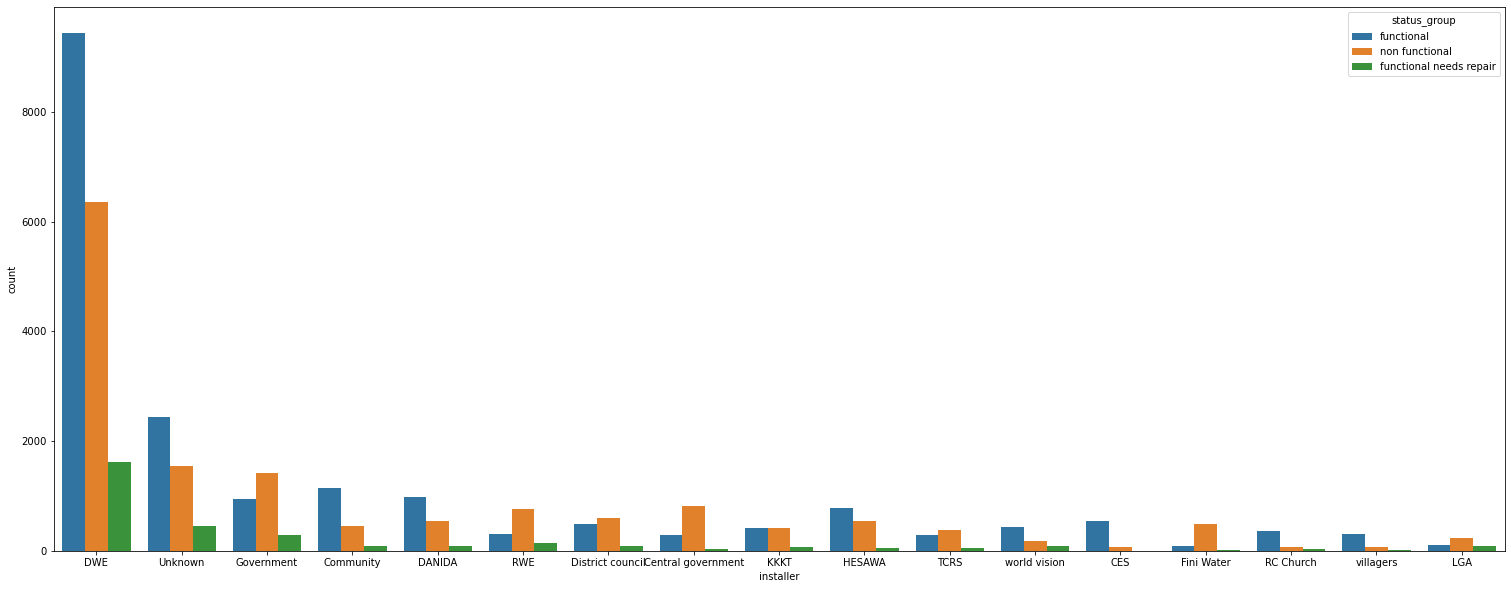

In [60]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='installer', hue="status_group", data=df_installer)

In [61]:
df['installer_cat'] = df['installer'] # To make new categorizes, creating new column

In [62]:
#df_test['installer_cat'] = df_test['installer']

In [63]:
installer_data = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df.loc[~df["installer_cat"].isin(installer_data), "installer_cat"] = "Others"

#### funder column

In [64]:
df.funder.nunique()

1897

In [65]:
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)

The funder column has 1896 unique values that are highly categorical.

We'll first  replace the null values with unknown. 

We'll take the first 30 and assign the other column as others.

In [66]:
df.funder.value_counts().head(30)

Government Of Tanzania    9084
Unknown                   4416
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Netherlands                470
Hifab                      450
Adb                        448
Lga                        442
Amref                      425
Fini Water                 393
Oxfam                      359
Wateraid                   333
Rc Church                  321
Isf                        316
Name: funder, dtype: int64

In [67]:
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Unknown']              
df3 = df.loc[df['funder']== 'Danida'] 
df4 = df.loc[df['funder']== 'Hesawa'] 
df5 = df.loc[df['funder']== 'Rwssp'] 
df6 = df.loc[df['funder']== 'World Bank'] 
df7 = df.loc[df['funder']== 'Kkkt'] 
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef'] 
df10 = df.loc[df['funder']== 'Tasaf'] 
df11 = df.loc[df['funder']== 'District Council'] 
df12 = df.loc[df['funder']== 'Dhv'] 
df13 = df.loc[df['funder']== 'Private Individual'] 
df14 = df.loc[df['funder']== 'Dwsp'] 
df15 = df.loc[df['funder']== 'Norad'] 
df16 = df.loc[df['funder']== 'Germany Republi']
df17 = df.loc[df['funder']== 'Tcrs']
df18 = df.loc[df['funder']== 'Ministry Of Water']
df19 = df.loc[df['funder']== 'Water']
df20 = df.loc[df['funder']== 'Dwe']
df21 = df.loc[df['funder']== 'Netherlands']
df22 = df.loc[df['funder']== 'Hifab']
df23 = df.loc[df['funder']== 'Adb']
df24 = df.loc[df['funder']== 'Lga']
df25 = df.loc[df['funder']== 'Amref']
df26 = df.loc[df['funder']== 'Fini Water']
df27 = df.loc[df['funder']== 'Oxfam']
df28 = df.loc[df['funder']== 'Wateraid']
df29 = df.loc[df['funder']== 'Rc Church']
df30 = df.loc[df['funder']== 'Isf']

In [68]:
df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30], ignore_index=True)

In [69]:
df['funder_cat'] = df['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe','Netherlands','Hifab','Adb','Lga','Amref','Fini Water','Oxfam','Wateraid','Rc Church','Isf']
    

df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

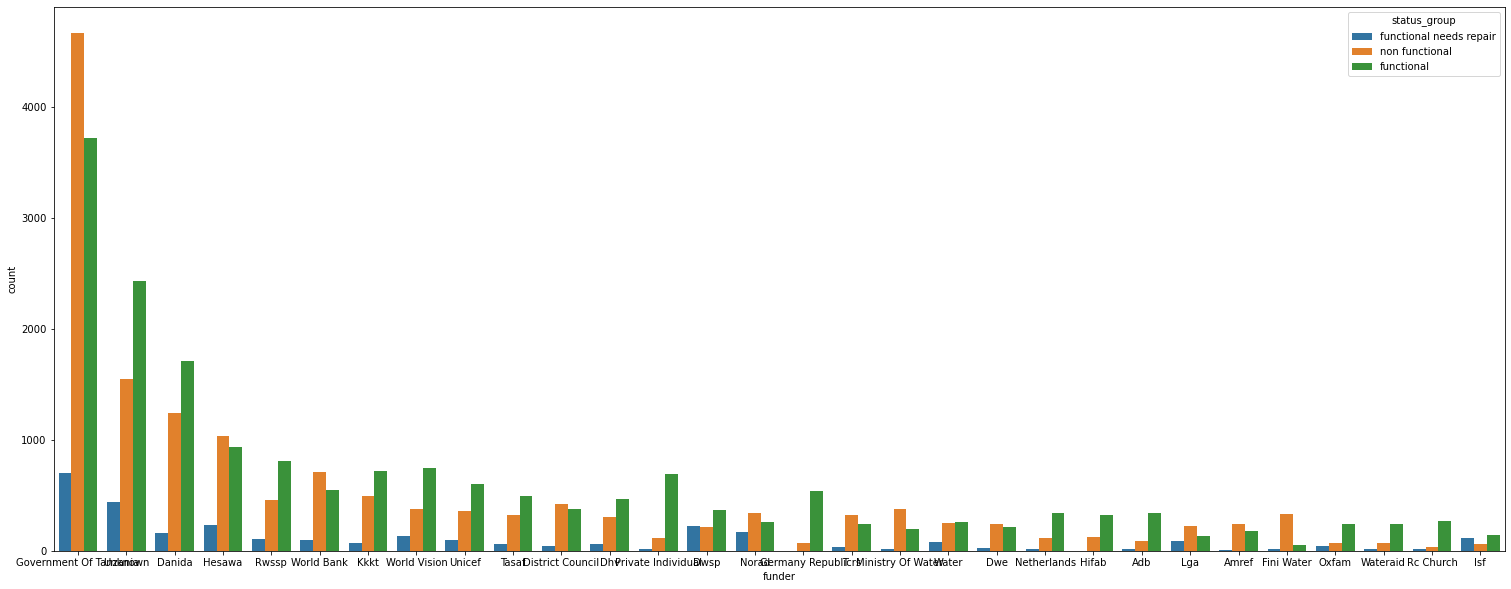

In [112]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='funder', hue="status_group", data=df_funder)

In [70]:
df['funder_cat'].nunique() 

31

In [71]:
df.funder_cat.unique()

array(['Others', 'Unicef', 'Dwsp', 'Rwssp', 'Wateraid', 'Danida',
       'World Vision', 'Hesawa', 'Isf', 'Government Of Tanzania', 'Water',
       'Private Individual', 'Unknown', 'Lga', 'District Council', 'Kkkt',
       'Norad', 'Dwe', 'Rc Church', 'Tcrs', 'Germany Republi',
       'Netherlands', 'Tasaf', 'World Bank', 'Fini Water', 'Dhv', 'Amref',
       'Ministry Of Water', 'Adb', 'Oxfam', 'Hifab'], dtype=object)

The funder column has 1896 unique values that are highly categorical.

We'll take the first 30 and assign the other column as others.

#### construction_year 

In [72]:
df.construction_year.value_counts()

0       20709
2010     2644
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [73]:
df.construction_year.value_counts()

0       20709
2010     2644
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

#### public_meeting column

In [74]:
df['public_meeting'].value_counts()
df['public_meeting'].fillna(value=True, inplace=True)
df.public_meeting.value_counts()
#df.drop("public_meeting" , axis =1)

True     54344
False     5055
Name: public_meeting, dtype: int64

There are some null values and we convert them to most common data

#### permit column

In [75]:
df['permit'].value_counts()
df['permit'].fillna(value=True, inplace=True)
#df.drop("permit",axis =1)

There are some null values and we convert them to most common data

#### population column

In [76]:
df.loc[df['population']==0].groupby('status_group').count()

,id,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,lga,...,construction_year,extraction_type_class,management_group,payment,water_quality,quantity,source,waterpoint_type,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274,...,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,...,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332,...,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332


In [77]:
df.population.value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [78]:
df.population.isna().sum()

0

Some functional water points has zero population, it is weird so we will change zero population to mean

In [79]:
df['population'].replace(to_replace = 0 , value =281, inplace=True)

In [80]:
df.sort_values(by='population', ascending=False).head(50).groupby('status_group').count()

,id,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,lga,...,construction_year,extraction_type_class,management_group,payment,water_quality,quantity,source,waterpoint_type,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,
functional,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
functional needs repair,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
non functional,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


To see the most populated areas water point functionality , we choose crowded 50 values and did groupby. It shows that higher population areas have more functional water points.

In [81]:
df.shape

(59399, 25)

In [82]:
df.head()

,id,status_group,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,...,construction_year,extraction_type_class,management_group,payment,water_quality,quantity,source,waterpoint_type,installer_cat,funder_cat
0,69572,functional,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,...,1999,gravity,user-group,pay annually,soft,enough,spring,communal standpipe,Others,Others
2,34310,functional,2/25/2013,Lottery Club,686,world vision,37.460664,-3.821329,Pangani,Manyara,...,2009,gravity,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,world vision,Others
3,67743,non functional,1/28/2013,Unicef,263,Unicef,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,...,1986,submersible,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,Others,Unicef
4,19728,functional,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,...,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,Others,Others
5,9944,functional,3/13/2011,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Pangani,Tanga,...,2009,submersible,user-group,pay per bucket,salty,enough,other,communal standpipe multiple,DWE,Others


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59399 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59399 non-null  int64  
 1   status_group           59399 non-null  object 
 2   date_recorded          59399 non-null  object 
 3   funder                 59399 non-null  object 
 4   gps_height             59399 non-null  int64  
 5   installer              59399 non-null  object 
 6   longitude              59399 non-null  float64
 7   latitude               59399 non-null  float64
 8   basin                  59399 non-null  object 
 9   region                 59399 non-null  object 
 10  lga                    59399 non-null  object 
 11  ward                   59399 non-null  object 
 12  population             59399 non-null  int64  
 13  public_meeting         59399 non-null  bool   
 14  permit                 59399 non-null  bool   
 15  co

In [84]:
df.permit = df.permit.astype("bool").astype(int)
df.public_meeting = df.public_meeting. astype("bool").astype(int)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59399 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59399 non-null  int64  
 1   status_group           59399 non-null  object 
 2   date_recorded          59399 non-null  object 
 3   funder                 59399 non-null  object 
 4   gps_height             59399 non-null  int64  
 5   installer              59399 non-null  object 
 6   longitude              59399 non-null  float64
 7   latitude               59399 non-null  float64
 8   basin                  59399 non-null  object 
 9   region                 59399 non-null  object 
 10  lga                    59399 non-null  object 
 11  ward                   59399 non-null  object 
 12  population             59399 non-null  int64  
 13  public_meeting         59399 non-null  int32  
 14  permit                 59399 non-null  int32  
 15  co

### Exploratory Data Analysis

In [86]:
def df_subgroups(seriesName, norm = True):
    """This function creates a workable dataframe 
    grouping a Series by status_group"""
    
    dataframe_groupings = df.groupby('status_group')[seriesName].value_counts(normalize = norm).unstack()
    return dataframe_groupings

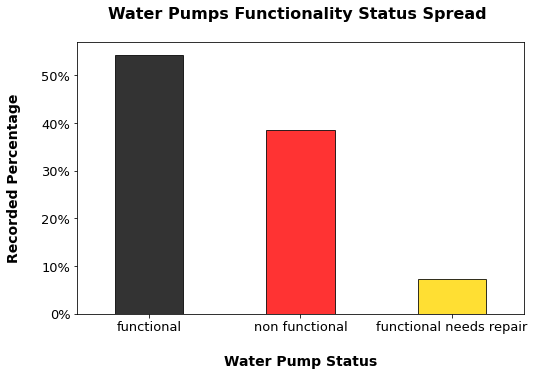

In [87]:
ax = df.status_group.value_counts(normalize = True).plot(kind = 'bar', width = .45, figsize = (8, 5), 
                                                         color = ['black', 'red', 'gold'],
                                                         edgecolor = 'black', alpha = .8)

#Format x- and y-axis
plt.xticks(fontsize = 13,  rotation = 0)
plt.xlabel('\nWater Pump Status', fontweight = 'bold', fontsize = 14 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.yticks(fontsize = 13)
plt.ylabel('Recorded Percentage\n', fontweight = 'bold', fontsize = 14)

#Format plot
plt.title('Water Pumps Functionality Status Spread \n', fontsize = 16, fontweight = 'bold');

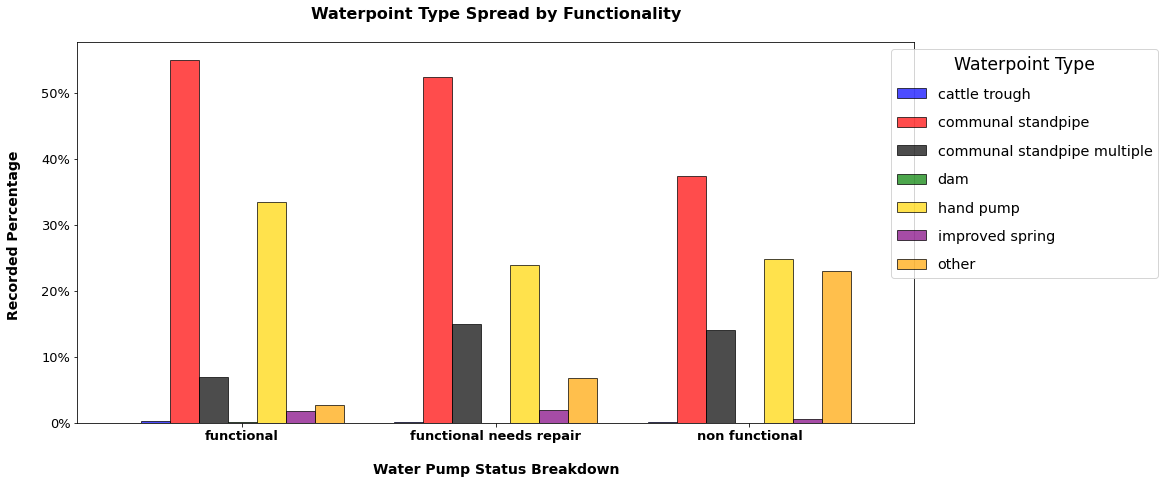

In [88]:
#Create workable datafame for visualization
wtp = df_subgroups('waterpoint_type')

#Plot the waterpoint type to status group
ax = wtp.plot(kind = 'bar', figsize = (15, 7), color = ['blue', 'red', 'black', 'green', 
                                                       'gold', 'purple', 'orange'], alpha = .7,
             width = .8, edgecolor = 'black')

#Format axis
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)
plt.xlabel('\nWater Pump Status Breakdown', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

#Format plot
ax.legend(loc = 'upper right', bbox_to_anchor = (1.3, 1), title = 'Waterpoint Type',
          title_fontsize = 'xx-large', fontsize = 'x-large', labelspacing = 1)
plt.title("Waterpoint Type Spread by Functionality\n", fontsize = 16, fontweight = 'bold');

#### water quality

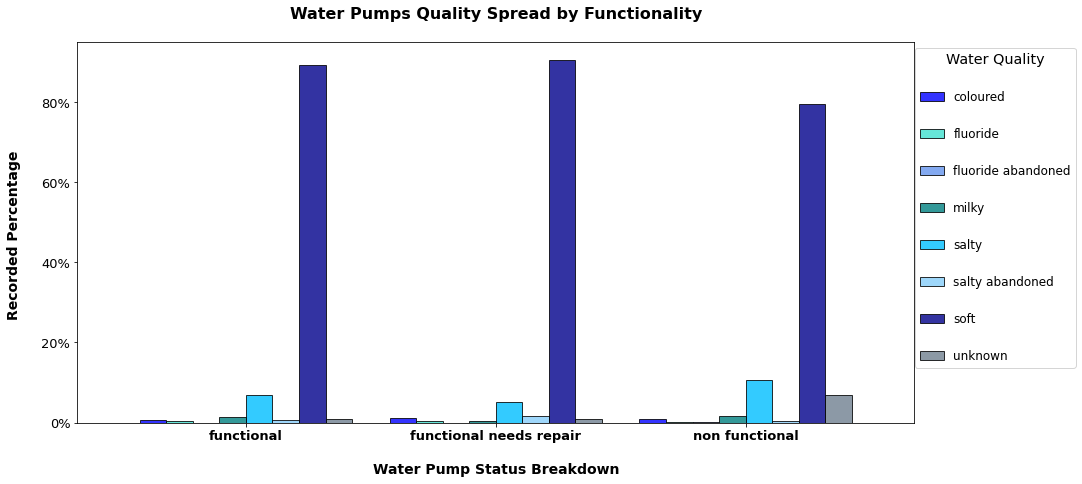

In [89]:
qual = df_subgroups('water_quality')

#Plot the waterpoint type to status group
ax = qual.plot(kind = 'bar', figsize = (15, 7), width = .85, alpha = .8, edgecolor = 'black', 
               color = ['blue', 'turquoise', 'cornflowerblue', 'teal', 
                        'deepskyblue', 'lightskyblue', 'darkblue', 'slategray'])

#Format axis
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)
plt.xlabel('\nWater Pump Status Breakdown', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

#Format plot
ax.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1), title = 'Water Quality',
          title_fontsize = 'x-large', fontsize = 'large', labelspacing = 2)
plt.title("Water Pumps Quality Spread by Functionality\n", fontsize = 16, fontweight = 'bold');

#### Funding 

In [107]:
Funder = df_subgroups("funder_cat")

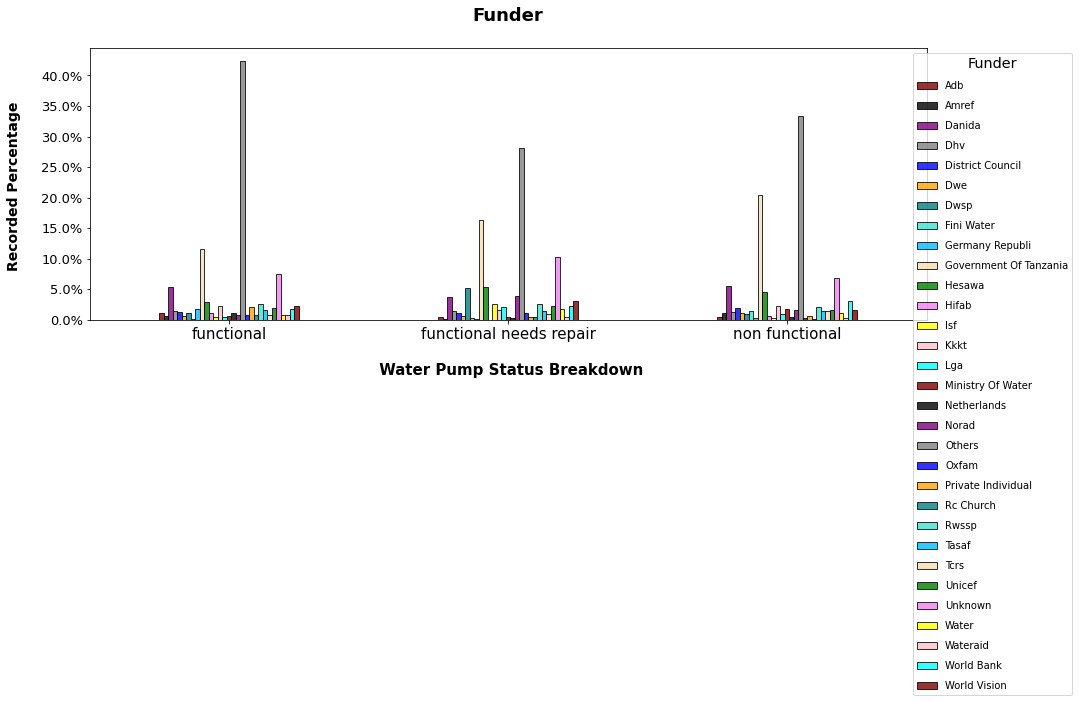

In [111]:
ax2 = Funder.plot(kind = 'bar', figsize = (15, 5), edgecolor = 'black', alpha = .8,
                  color = ["maroon", 'black', 'purple', 'grey', 'blue', "orange","teal",
                          'turquoise', 'deepskyblue', 'wheat', "green", 'violet',"yellow","pink","cyan"])

plt.xticks(fontsize = 15, rotation = 0)
plt.xlabel('\n Water Pump Status Breakdown', fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

ax2.legend(loc = 'upper right', bbox_to_anchor = (1.18, 1), title = 'Funder',
          title_fontsize = 'x-large', fontsize = 'medium', labelspacing = 1)
plt.title("Funder\n", fontsize = 18, fontweight = 'bold');

#### water source

In [90]:
source2 = df_subgroups("source")

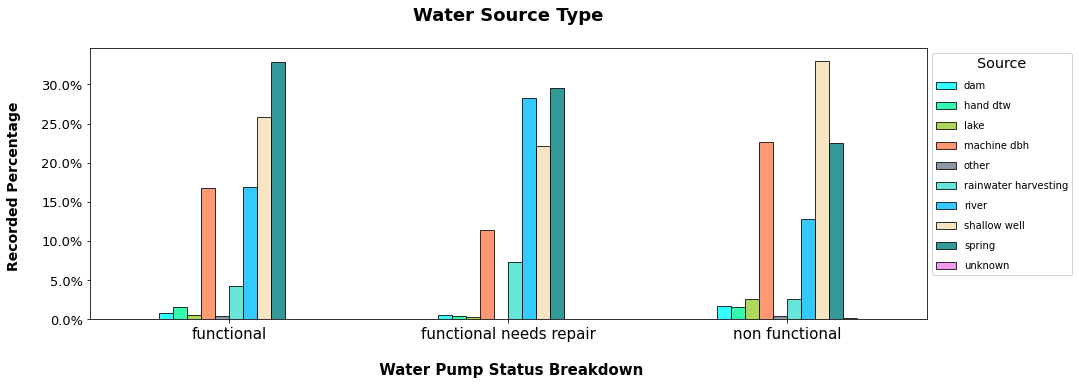

In [91]:
ax2 = source2.plot(kind = 'bar', figsize = (15, 5), edgecolor = 'black', alpha = .8,
                  color = ['cyan', 'mediumspringgreen', 'yellowgreen', 'coral', 'slategray', 
                          'turquoise', 'deepskyblue', 'wheat', 'teal', 'violet'])

plt.xticks(fontsize = 15, rotation = 0)
plt.xlabel('\n Water Pump Status Breakdown', fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

ax2.legend(loc = 'upper right', bbox_to_anchor = (1.18, 1), title = 'Source',
          title_fontsize = 'x-large', fontsize = 'medium', labelspacing = 1)
plt.title("Water Source Type\n", fontsize = 18, fontweight = 'bold');

#### quantity_group

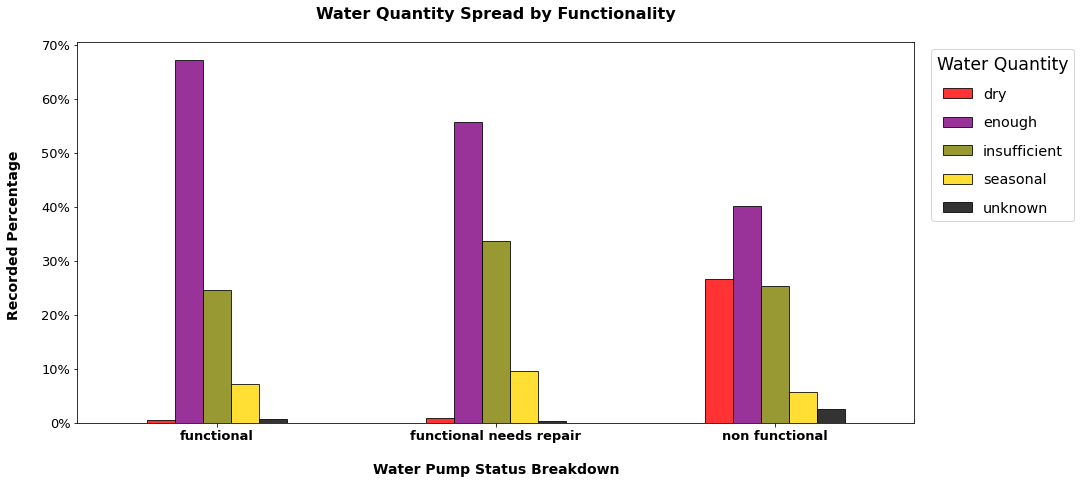

In [92]:
quant = df_subgroups("quantity")

#Plot the quantity to status group
ax = quant.plot(kind = 'bar', figsize = (15, 7), alpha = .8, edgecolor = 'black', 
                color = ['red', 'purple', 'olive', 'gold', 'black'])

#Format axis
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)
plt.xlabel('\nWater Pump Status Breakdown', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

#Format plot
ax.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1), title = 'Water Quantity',
          title_fontsize = 'xx-large', fontsize = 'x-large', labelspacing = 1)
plt.title("Water Quantity Spread by Functionality\n", fontsize = 16, fontweight = 'bold');

#### extraction type

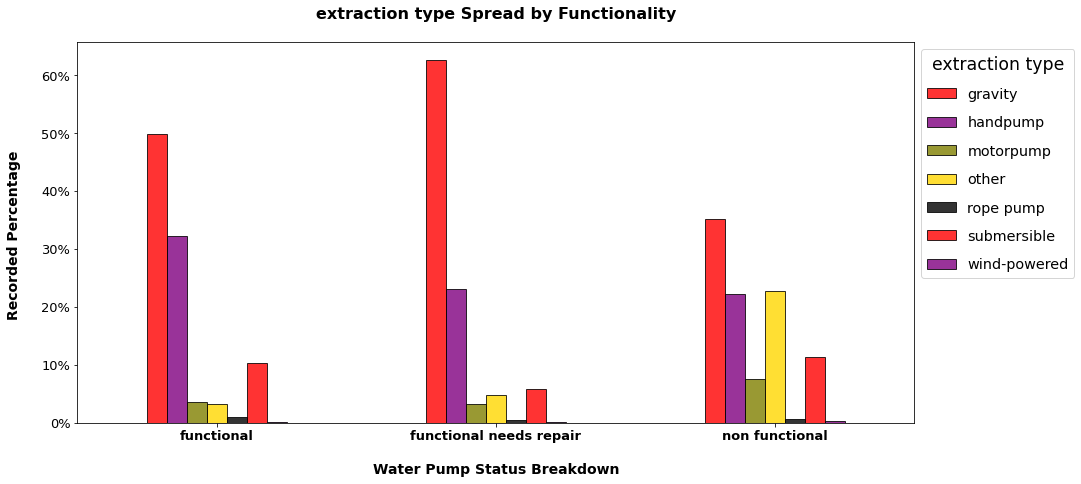

In [93]:
extract = df_subgroups("extraction_type_class")

#Plot the quantity to status group
ax = extract.plot(kind = 'bar', figsize = (15, 7), alpha = .8, edgecolor = 'black', 
                color = ['red', 'purple', 'olive', 'gold', 'black'])

#Format axis
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)
plt.xlabel('\nWater Pump Status Breakdown', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

#Format plot
ax.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1), title = 'extraction type',
          title_fontsize = 'xx-large', fontsize = 'x-large', labelspacing = 1)
plt.title("extraction type Spread by Functionality\n", fontsize = 16, fontweight = 'bold');

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59399 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59399 non-null  int64  
 1   status_group           59399 non-null  object 
 2   date_recorded          59399 non-null  object 
 3   funder                 59399 non-null  object 
 4   gps_height             59399 non-null  int64  
 5   installer              59399 non-null  object 
 6   longitude              59399 non-null  float64
 7   latitude               59399 non-null  float64
 8   basin                  59399 non-null  object 
 9   region                 59399 non-null  object 
 10  lga                    59399 non-null  object 
 11  ward                   59399 non-null  object 
 12  population             59399 non-null  int64  
 13  public_meeting         59399 non-null  int32  
 14  permit                 59399 non-null  int32  
 15  co

In [95]:
#df.drop(columns = ["permit","public_meeting"], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59399 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59399 non-null  int64  
 1   status_group           59399 non-null  object 
 2   date_recorded          59399 non-null  object 
 3   funder                 59399 non-null  object 
 4   gps_height             59399 non-null  int64  
 5   installer              59399 non-null  object 
 6   longitude              59399 non-null  float64
 7   latitude               59399 non-null  float64
 8   basin                  59399 non-null  object 
 9   region                 59399 non-null  object 
 10  lga                    59399 non-null  object 
 11  ward                   59399 non-null  object 
 12  population             59399 non-null  int64  
 13  public_meeting         59399 non-null  int32  
 14  permit                 59399 non-null  int32  
 15  co

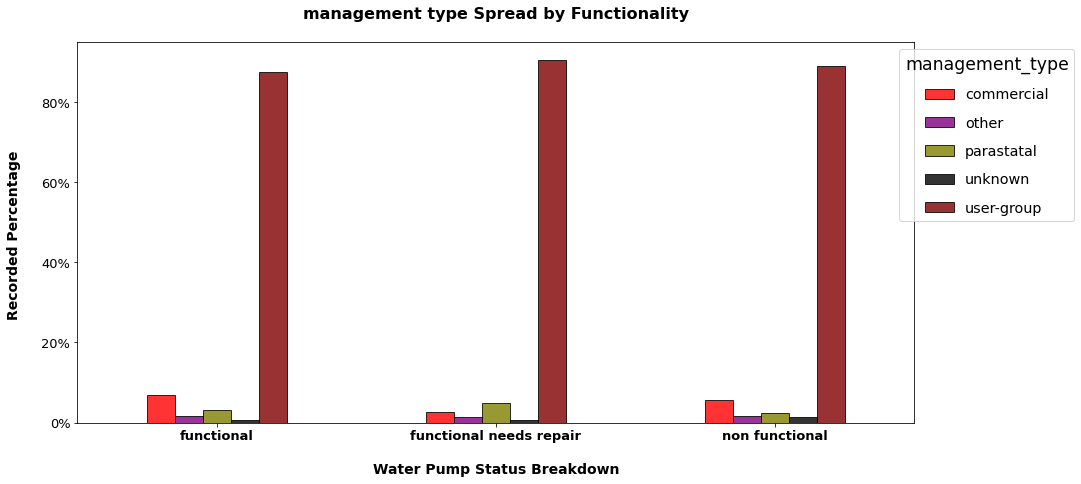

In [96]:
management_type = df_subgroups("management_group")

#Plot the quantity to status group
ax = management_type.plot(kind = 'bar', figsize = (15, 7), alpha = .8, edgecolor = 'black', 
                color = ['red', 'purple', 'olive', 'black',"maroon","yellow","orange","green","gold","forestgreen","slategray","brown"])

#Format axis
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)
plt.xlabel('\nWater Pump Status Breakdown', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

#Format plot
ax.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1), title = 'management_type',
          title_fontsize = 'xx-large', fontsize = 'x-large', labelspacing = 1)
plt.title("management type Spread by Functionality\n", fontsize = 16, fontweight = 'bold');

#### payment

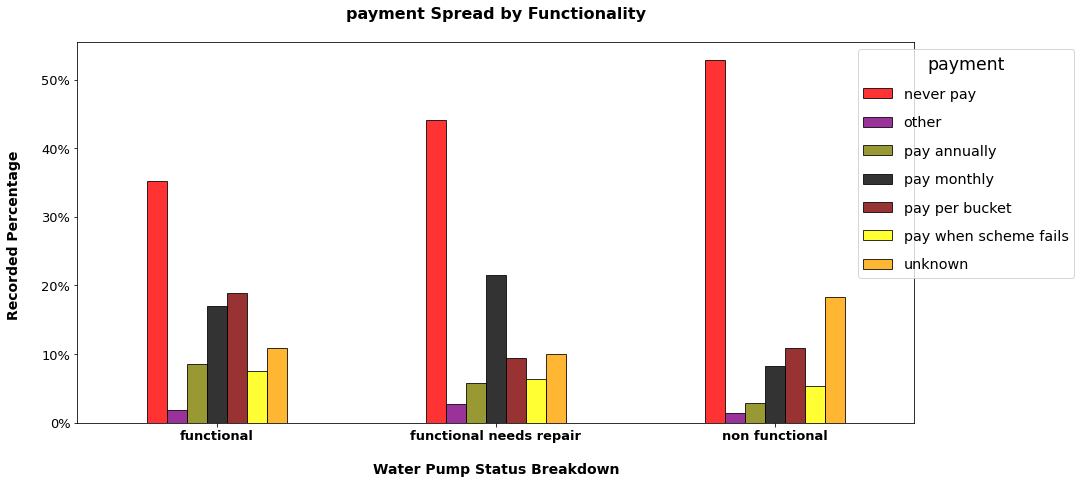

In [97]:
payment = df_subgroups("payment")

#Plot the quantity to status group
ax = payment.plot(kind = 'bar', figsize = (15, 7), alpha = .8, edgecolor = 'black', 
                color = ['red', 'purple', 'olive', 'black',"maroon","yellow","orange","green","gold","forestgreen","slategray","brown"])

#Format axis
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)
plt.xlabel('\nWater Pump Status Breakdown', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

#Format plot
ax.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1), title = 'payment',
          title_fontsize = 'xx-large', fontsize = 'x-large', labelspacing = 1)
plt.title("payment Spread by Functionality\n", fontsize = 16, fontweight = 'bold');

#### FEATURE ENGINEERING

In [98]:
df[["day", "month", "Year"]] = df["date_recorded"].str.split("/", expand = True)

df[['day', 'month', 'Year']] = df[['day', 'month', 'Year']].astype(int)
df['construction_year'].loc[df['construction_year'] == 0] = df['Year']

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [99]:
df.drop("date_recorded",axis =1,inplace = True)

In [100]:
df['age_of_well'] = df['Year'] - df['construction_year']
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59399 entries, 0 to 59399
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59399 non-null  int64  
 1   status_group           59399 non-null  object 
 2   funder                 59399 non-null  object 
 3   gps_height             59399 non-null  int64  
 4   installer              59399 non-null  object 
 5   longitude              59399 non-null  float64
 6   latitude               59399 non-null  float64
 7   basin                  59399 non-null  object 
 8   region                 59399 non-null  object 
 9   lga                    59399 non-null  object 
 10  ward                   59399 non-null  object 
 11  population             59399 non-null  int64  
 12  public_meeting         59399 non-null  int32  
 13  permit                 59399 non-null  int32  
 14  construction_year      59399 non-null  int64  
 15  ex

In [101]:
mean_lat_train = df['latitude'].mean()
mean_long_train = df['longitude'].mean()
df['distance_x_height'] = np.sqrt((df['gps_height']**2 + df['longitude'] - mean_long_train)**2 + (df['latitude'] - mean_lat_train)**2)

In [102]:
df.head()

,id,status_group,funder,gps_height,installer,longitude,latitude,basin,region,lga,...,quantity,source,waterpoint_type,installer_cat,funder_cat,day,month,Year,age_of_well,distance_x_height
0,69572,functional,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,...,enough,spring,communal standpipe,Others,Others,3,14,2011,12,1.932101e+06
2,34310,functional,Lottery Club,686,world vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,...,enough,dam,communal standpipe multiple,world vision,Others,2,25,2013,4,4.705994e+05
3,67743,non functional,Unicef,263,Unicef,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,...,dry,machine dbh,communal standpipe multiple,Others,Unicef,1,28,2013,27,6.917341e+04
4,19728,functional,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,...,seasonal,rainwater harvesting,communal standpipe,Others,Others,7,13,2011,0,4.872614e+00
5,9944,functional,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Pangani,Tanga,Mkinga,...,enough,other,communal standpipe multiple,DWE,Others,3,13,2011,2,5.181452e+00


In [103]:
df = df.drop(columns = ["installer","ward","lga",'Year', 'month', 'day','construction_year',"latitude","longitude","gps_height","funder"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59399 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59399 non-null  int64  
 1   status_group           59399 non-null  object 
 2   basin                  59399 non-null  object 
 3   region                 59399 non-null  object 
 4   population             59399 non-null  int64  
 5   public_meeting         59399 non-null  int32  
 6   permit                 59399 non-null  int32  
 7   extraction_type_class  59399 non-null  object 
 8   management_group       59399 non-null  object 
 9   payment                59399 non-null  object 
 10  water_quality          59399 non-null  object 
 11  quantity               59399 non-null  object 
 12  source                 59399 non-null  object 
 13  waterpoint_type        59399 non-null  object 
 14  installer_cat          59399 non-null  object 
 15  fu

In [104]:
#saving the cleaned training data

In [105]:
df.to_csv("clean_training.csv",index = False)